In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export_text
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import Image
from IPython.core.display import HTML

In [7]:
data = pd.read_csv('forbes_2022_billionaires.csv')
data.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [8]:
#Кодирование категориальных признаков
category_cols = ['personName', 'category', 'source', 'country', 'state', 
                 'city', 'countryOfCitizenship', 'organization', 'gender', 
                'birthDate', 'title', 'residenceMsa', 'bio', 'about']

print('Количество уникальных значений\n')
for col in category_cols:
    print(f'{col}: {data[col].unique().size}')

Количество уникальных значений

personName: 2666
category: 18
source: 914
country: 74
state: 43
city: 750
countryOfCitizenship: 75
organization: 317
gender: 3
birthDate: 2045
title: 95
residenceMsa: 110
bio: 2668
about: 1549


In [9]:
remove_cols = ['personName', 'birthDate', 'bio', 'about']
for col in remove_cols:
    category_cols.remove(col)
data = pd.get_dummies(data, columns=category_cols)

data.drop(remove_cols, axis=1, inplace=True)
data.describe()

,rank,age,finalWorth,year,month,philanthropyScore,numberOfSiblings,category_Automotive,category_Construction & Engineering,category_Diversified,...,"residenceMsa_Sioux Falls, SD","residenceMsa_Springfield, IL","residenceMsa_Springfield, MO","residenceMsa_St. Louis, MO","residenceMsa_Tampa-St. Petersburg, FL","residenceMsa_Tulsa, OK","residenceMsa_Virginia Beach, VA","residenceMsa_Washington, DC","residenceMsa_Wichita, KS","residenceMsa_Youngstown, OH"
count,2668.000000,2582.000000,2668.000000,2668.0,2668.0,396.000000,127.000000,2668.000000,2668.000000,2668.000000,...,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000
mean,1302.919040,64.210689,4762.350075,2022.0,4.0,1.856061,2.732283,0.026237,0.017241,0.067466,...,0.000375,0.000375,0.000375,0.001874,0.002249,0.000750,0.000375,0.004873,0.000375,0.000375
std,747.807782,13.401258,10540.482258,0.0,0.0,0.971486,1.891706,0.159869,0.130194,0.250875,...,0.019360,0.019360,0.019360,0.043258,0.047378,0.027374,0.019360,0.069647,0.019360,0.019360
min,1.000000,19.000000,1000.000000,2022.0,4.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,665.000000,55.000000,1500.000000,2022.0,4.0,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1292.000000,64.000000,2400.000000,2022.0,4.0,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1929.000000,74.000000,4300.000000,2022.0,4.0,2.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2578.000000,100.000000,219000.000000,2022.0,4.0,5.000000,14.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.head()

,rank,age,finalWorth,year,month,selfMade,philanthropyScore,numberOfSiblings,category_Automotive,category_Construction & Engineering,...,"residenceMsa_Sioux Falls, SD","residenceMsa_Springfield, IL","residenceMsa_Springfield, MO","residenceMsa_St. Louis, MO","residenceMsa_Tampa-St. Petersburg, FL","residenceMsa_Tulsa, OK","residenceMsa_Virginia Beach, VA","residenceMsa_Washington, DC","residenceMsa_Wichita, KS","residenceMsa_Youngstown, OH"
0,1,50.0,219000.0,2022,4,True,1.0,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,58.0,171000.0,2022,4,True,1.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,73.0,158000.0,2022,4,False,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,66.0,129000.0,2022,4,True,4.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,91.0,118000.0,2022,4,True,5.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Корреляционный анализ
print('Признаки, имеющие максимальную по модулю корреляцию с зп миллиардеров')
best_params = data.corr()['finalWorth'].map(abs).sort_values(ascending=False)[1:]
best_params = best_params[best_params.values > 0.35]
best_params

Признаки, имеющие максимальную по модулю корреляцию с зп миллиардеров


rank                    0.437261
organization_Tesla      0.393645
source_Tesla, SpaceX    0.393645
Name: finalWorth, dtype: float64

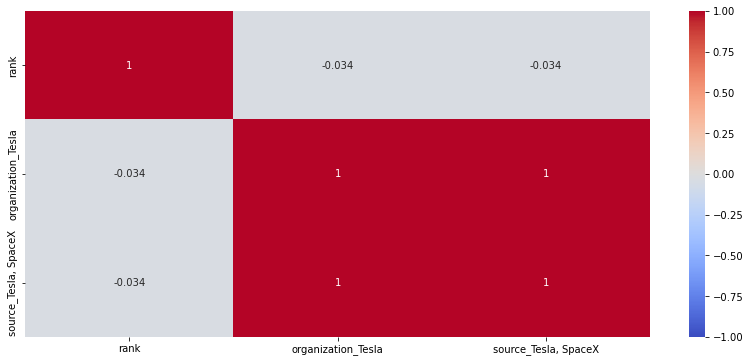

In [12]:
plt.figure(figsize=(14, 6))
sns.heatmap(data[best_params.index].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

In [13]:
best_params = best_params.drop(['source_Tesla, SpaceX'])

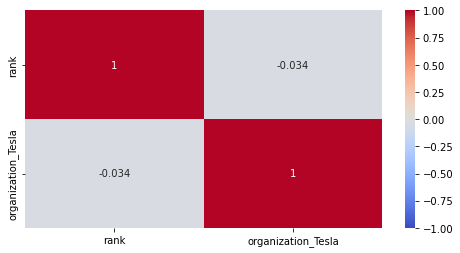

In [14]:
plt.figure(figsize=(8, 4))
sns.heatmap(data[best_params.index].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

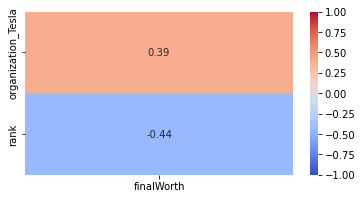

In [16]:
plt.figure(figsize=(6, 3))
sns.heatmap(pd.DataFrame(data[np.append(best_params.index.values, 'finalWorth')].corr()['finalWorth'].sort_values(ascending=False)[1:]), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

In [17]:
#Разделение выборки на обучающую и тестовую
y = data['finalWorth']
X = data[best_params.index]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [18]:
#Линейная регрессия
def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
print_metrics(y_test, y_pred_linear)

R^2: 0.20932301754048654
MSE: 65032111.129304886
MAE: 3389.699505062321


In [19]:
#Пополиномиальная регрессия
poly_model = PolynomialFeatures(degree=3)
x_train_poly = poly_model.fit_transform(x_train)
x_test_poly = poly_model.fit_transform(x_test)
linear_model = LinearRegression()
linear_model.fit(x_train_poly, y_train)
y_pred_poly = linear_model.predict(x_test_poly)
print_metrics(y_test, y_pred_poly)

R^2: 0.46758708844880414
MSE: 43790241.019754305
MAE: 2886.4778091857947


In [20]:
#SVM
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_train_scaled.describe()

,rank,organization_Tesla
count,1.867000e+03,1.867000e+03
mean,-3.401433e-17,5.697549e-18
std,1.000268e+00,1.000268e+00
min,-1.722392e+00,-2.314964e-02
25%,-8.510212e-01,-2.314964e-02
50%,3.337817e-04,-2.314964e-02
75%,8.503543e-01,-2.314964e-02
max,1.716388e+00,4.319722e+01


In [21]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.1), np.arange(2, 15, 1)])}
svm_model = SVR(kernel='linear')
grid_cv = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1, scoring='r2')
grid_cv.fit(x_train_scaled, y_train)
print(grid_cv.best_params_)

{'C': 14.0}


In [22]:
best_svm_model = grid_cv.best_estimator_
best_svm_model = SVR(kernel='linear', C=11)
best_svm_model.fit(x_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

R^2: 0.09738331289583668
MSE: 74239000.25561784
MAE: 1955.9989311932136


In [23]:
#Дерево решений
params = {'min_samples_leaf': range(3, 30)}
tree = DecisionTreeRegressor(random_state=3)
grid_cv = GridSearchCV(estimator=tree, cv=5, param_grid=params, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

{'min_samples_leaf': 3}


In [24]:
best_tree = grid_cv.best_estimator_
best_tree.fit(x_train, y_train)
y_pred_tree = best_tree.predict(x_test)
print_metrics(y_test, y_pred_tree)

R^2: 0.9540007875396467
MSE: 3783372.9360338133
MAE: 122.86346612189307


In [25]:
importances = pd.DataFrame(data=zip(x_train.columns, best_tree.feature_importances_), columns=['Признак', 'Важность'])
print('Важность признаков в дереве решений\n')
for row in importances.sort_values(by='Важность', ascending=False).values:
    print(f'{row[0]}: {round(row[1], 3)}')

Важность признаков в дереве решений

rank: 1.0
organization_Tesla: 0.0


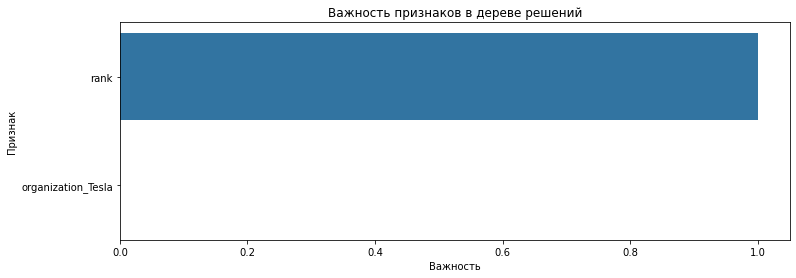

In [26]:
plt.figure(figsize=(12, 4))
sns.barplot(data=importances.sort_values(by='Важность', ascending=False), y='Признак', x='Важность', orient='h', )
plt.title('Важность признаков в дереве решений')
plt.show()

In [27]:
#Сравнение моделей
print('Линейная регрессия')
print_metrics(y_test, y_pred_linear)

print('\nПолиномиальная регрессия')
print_metrics(y_test, y_pred_poly)

print('\nМетод опорных векторов')
print_metrics(y_test, y_pred_svm)

print('\nДерево решений')
print_metrics(y_test, y_pred_tree)

Линейная регрессия
R^2: 0.20932301754048654
MSE: 65032111.129304886
MAE: 3389.699505062321

Полиномиальная регрессия
R^2: 0.46758708844880414
MSE: 43790241.019754305
MAE: 2886.4778091857947

Метод опорных векторов
R^2: 0.09738331289583668
MSE: 74239000.25561784
MAE: 1955.9989311932136

Дерево решений
R^2: 0.9540007875396467
MSE: 3783372.9360338133
MAE: 122.86346612189307
